In [6]:
import sys
sys.path.append('../')

from cube import Cube
from mcts import MCTS
from astar import Astar
from bfs import BFS

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
max_scramble_depth = 5
num_per_scramble_depth = 30
num_iterations_per_solve = 200_000

# MCTS or Astar
# algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
# algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')
algorithm = BFS(num_iter = num_iterations_per_solve)

In [3]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

100%|██████████| 30/30 [00:00<00:00, 245.80it/s]


Attempts:  [6, 8, 3, 4, 1, 2, 11, 10, 4, 8, 8, 11, 12, 11, 10, 7, 5, 2, 11, 4, 3, 11, 10, 1, 9, 10, 12, 1, 4, 3]
Mean:  6.733333333333333
Std:  3.7321426672742413


100%|██████████| 30/30 [00:01<00:00, 29.30it/s]


Attempts:  [13, 64, 63, 119, 30, 96, 117, 126, 16, 16, 52, 56, 124, 99, 73, 79, 35, 109, 16, 82, 13, 98, 86, 58, 68, 56, 111, 83, 112, 73]
Mean:  71.43333333333334
Std:  35.38142952956474


100%|██████████| 30/30 [00:08<00:00,  3.66it/s]


Attempts:  [159, 421, 525, 489, 748, 307, 154, 641, 955, 138, 590, 1109, 922, 1036, 475, 960, 640, 750, 368, 530, 412, 745, 916, 254, 1030, 764, 542, 528, 247, 1058]
Mean:  613.7666666666667
Std:  288.5751991345679


100%|██████████| 30/30 [01:28<00:00,  2.96s/it]


Attempts:  [2084, 9991, 7077, 4019, 3044, 5773, 9613, 5981, 8663, 3370, 8770, 4934, 9071, 10484, 6978, 6902, 10473, 9568, 3725, 10450, 5066, 2562, 8194, 4071, 5112, 7711, 3317, 3036, 5717, 58]
Mean:  6193.8
Std:  2859.0210259224514


100%|██████████| 30/30 [11:52<00:00, 23.76s/it]

Attempts:  [46550, 83885, 28862, 100727, 39976, 46013, 45005, 61216, 39949, 55232, 30921, 861, 35025, 91125, 45200, 11214, 101993, 11761, 56000, 74456, 73851, 23113, 54512, 187, 73674, 19252, 59716, 46464, 80386, 57880]
Mean:  49833.53333333333
Std:  27072.530813518137


Total attempts: [30, 30, 30, 30, 30]


<ErrorbarContainer object of 3 artists>

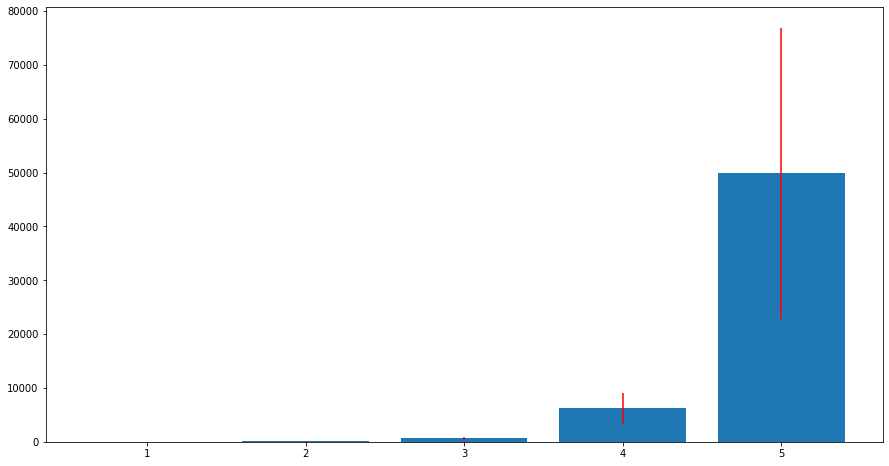

In [7]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts)
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red')